In [3]:
import matplotlib.pyplot as plt
import librosa as lb
import numpy as np
import scipy.signal as ss

In [ ]:
def calcul_decalage(path_file_full,path_file_background,fech=44100,nb_valid=1,plot=False):
    #### Fonction qui calcule le décalage entre 2 audio en utilisant la corrélation
    # path_file_full prends en entrée le chemin vers le fichier audio entier. Cela doit être une chaine de caractère.
    # path_file_background prends en entrée le chemin vers le fichier audio qui n'a que le background. Cela doit être une chaine de caractère.
    # fech est la fréquence d'échantillonage des signaux audio
    # plot est pour afficher l'autocorrelation
    # La fonction renvoie en 1er argument le décalage en temps et en deuxième argument le décalage en nombre de décalage a faire pour les aligner.
    y, sr = lb.load(path_file_full,sr=fech)
    y2, sr2 = lb.load(path_file_background,sr=fech)

    milieu_signal=np.int32(np.max(np.shape(y))/(2*sr))
    print("milieu signal = ",milieu_signal)
    temps_deb_f=(milieu_signal-25)*sr
    temps_fin_f=(milieu_signal+25)*sr
    temps_deb_b=(milieu_signal-10)*sr
    temps_fin_b=(milieu_signal+10)*sr
    signal_tout=np.array(y)
    signal_backgroung=np.array(y2)
    signal_full_tronque=signal_tout[temps_deb_f:temps_fin_f]
    signal_backgroung_tronque=signal_backgroung[temps_deb_b:temps_fin_b]


    corr_mes=ss.correlate(signal_backgroung_tronque,signal_full_tronque,'valid')

    if plot==True :
        plt.figure()
        plt.plot(corr_mes)
        plt.title("Mesure de la corrélation entre les 2 signaux")
        plt.xlabel("temps")
        plt.ylabel("correlation")
        plt.show()

    pos_max=np.argwhere(corr_mes==np.max(corr_mes))
    temps=(temps_deb_f+pos_max[0][0])/sr
    decalage=temps-temps_deb_b/sr
    print('le décalage est de',decalage,'s')
    return(decalage,pos_max[0][0])

milieu signal =  121


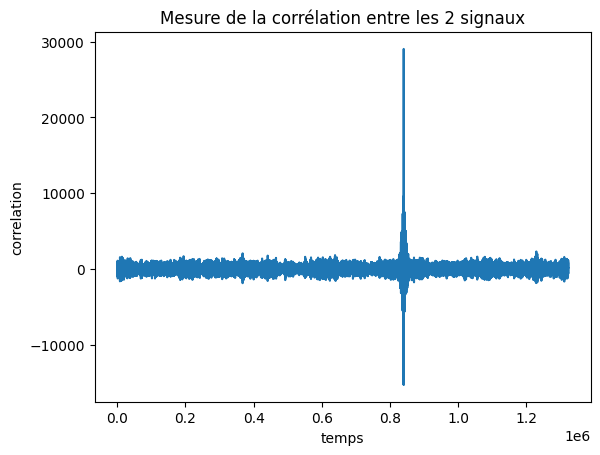

le décalage est de 4.053174603174597 s


In [12]:
dc , e = calcul_decalage('./base_donnees_deorian/deo_rian/DR-01-branquinha-ft.mp3','./base_donnees_deorian/deo_rian/DR-01-branquinha-pb.mp3',plot=True)